# 프로젝트 1 : 손수 설계하는 선형회귀, 당뇨병 수치를 맞춰보자!

## (1) 필요한 모듈 import 및 데이터 가져오기

In [192]:
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 
%config InlineBackend.figure_format = 'retina'

diabetes = load_diabetes()
df_X = diabetes.data
df_y = diabetes.target

In [193]:
diabetes.feature_names

['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']

## (2) 모델에 입력할 데이터 X 준비하기

In [194]:
df_X = np.array(df_X)
df_X[:5]

array([[ 0.03807591,  0.05068012,  0.06169621,  0.02187235, -0.0442235 ,
        -0.03482076, -0.04340085, -0.00259226,  0.01990842, -0.01764613],
       [-0.00188202, -0.04464164, -0.05147406, -0.02632783, -0.00844872,
        -0.01916334,  0.07441156, -0.03949338, -0.06832974, -0.09220405],
       [ 0.08529891,  0.05068012,  0.04445121, -0.00567061, -0.04559945,
        -0.03419447, -0.03235593, -0.00259226,  0.00286377, -0.02593034],
       [-0.08906294, -0.04464164, -0.01159501, -0.03665645,  0.01219057,
         0.02499059, -0.03603757,  0.03430886,  0.02269202, -0.00936191],
       [ 0.00538306, -0.04464164, -0.03638469,  0.02187235,  0.00393485,
         0.01559614,  0.00814208, -0.00259226, -0.03199144, -0.04664087]])

## (3) 모델에 예측할 데이터 y 준비하기

In [195]:
df_y = np.array(df_y)
df_y[:5]

array([151.,  75., 141., 206., 135.])

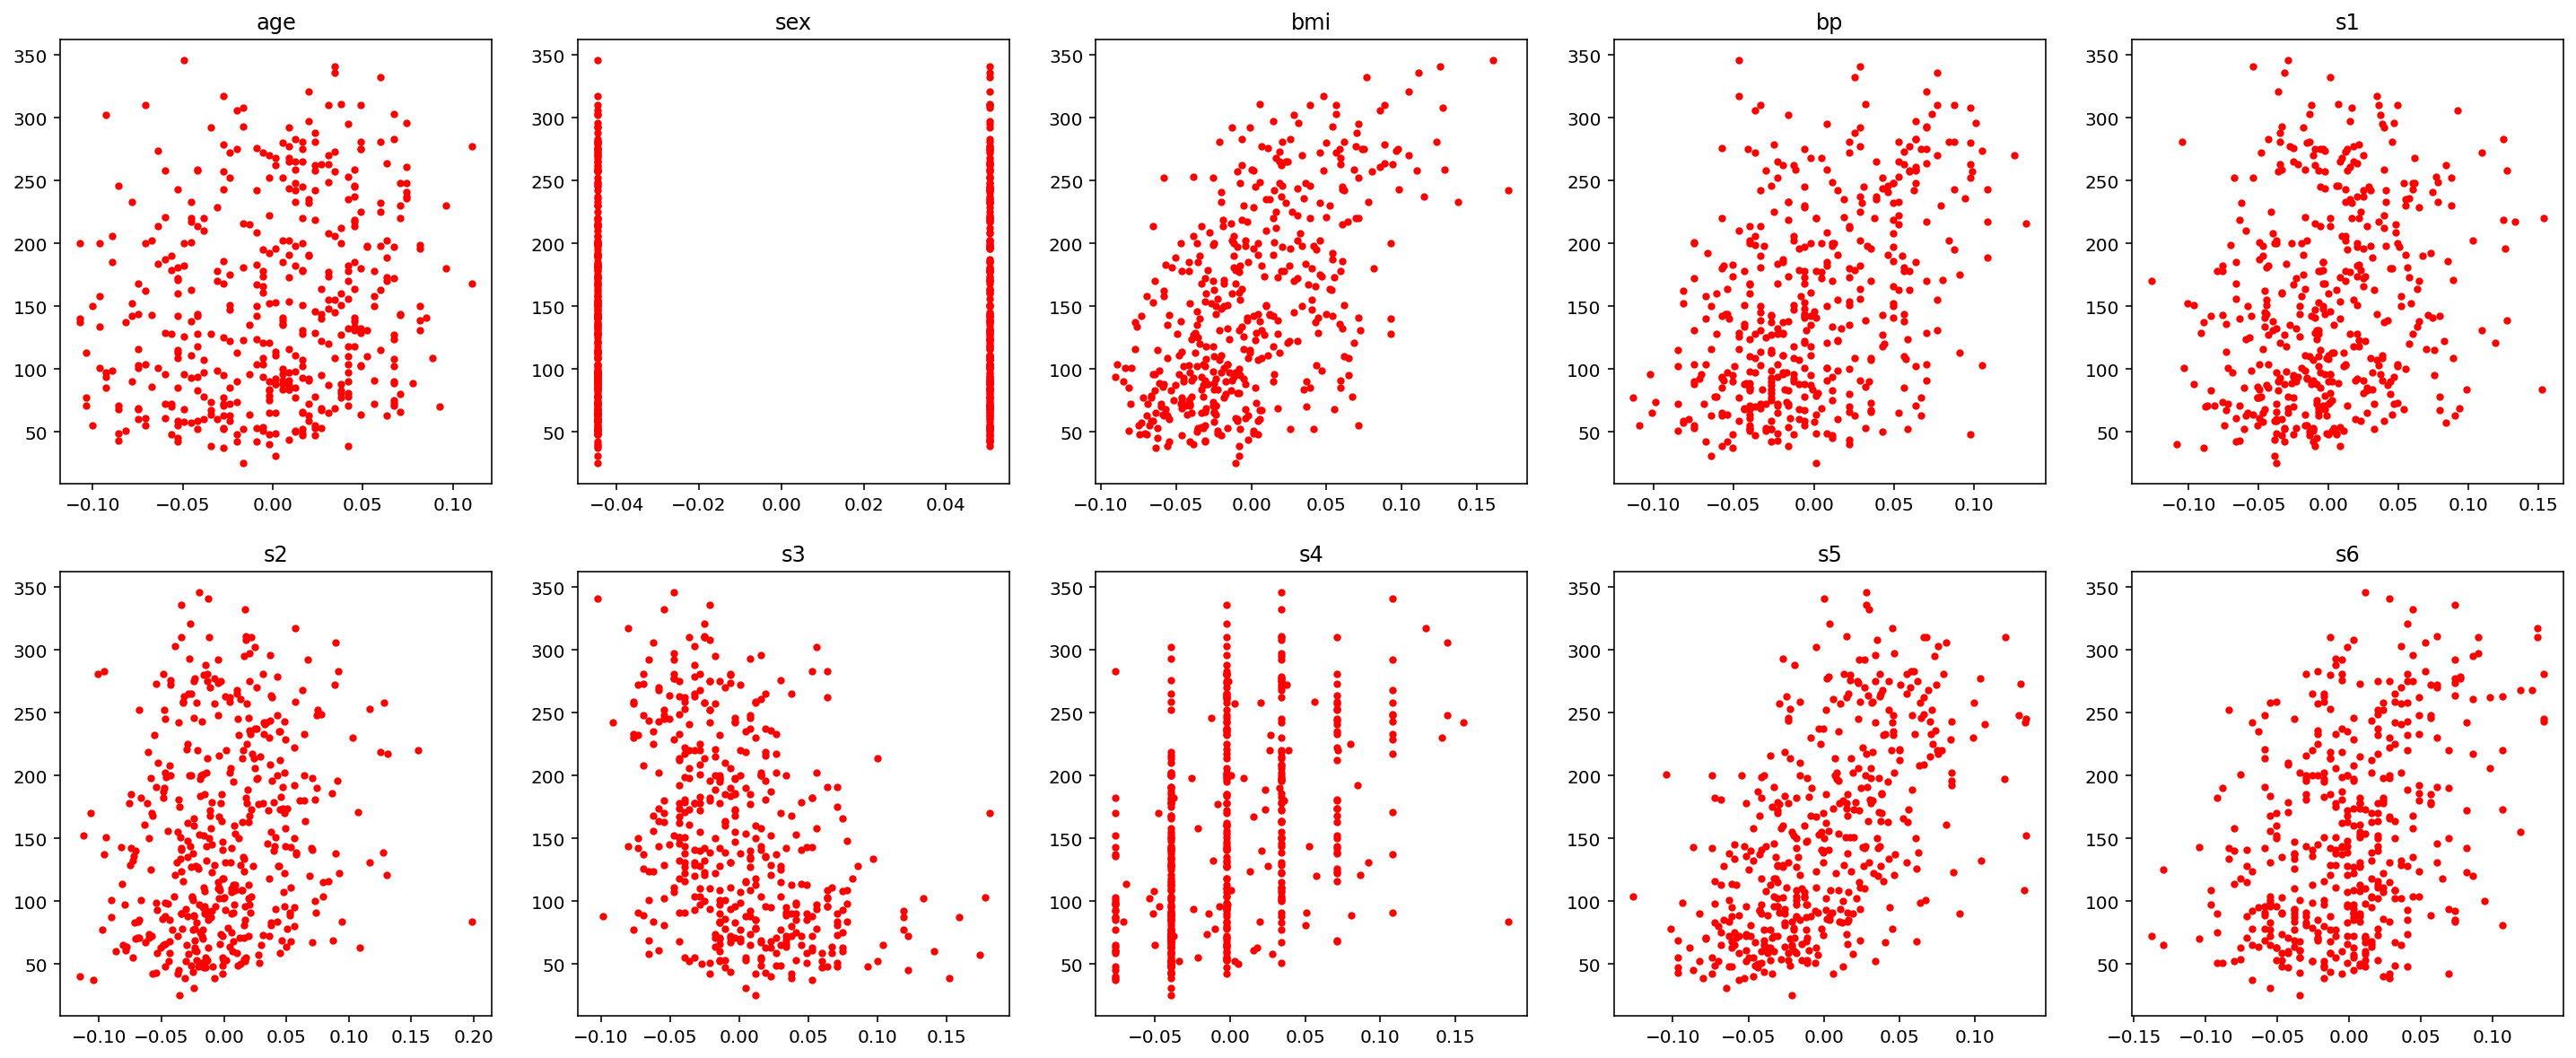

In [196]:
plt.figure(figsize=(25, 10))
for i in range(10) : 
    plt.subplot(2, 5, i+1)
    plt.title(diabetes.feature_names[i])
    plt.scatter(df_X[:,i], df_y, c='r', s=10)

그림상으로는 age, s1, s2, 범주형변수 sex를 제외하고 경향성이 어느정도 보인다

In [197]:
for i in range(10):
    print(diabetes.feature_names[i], np.corrcoef(df_X[:,i], df_y)[1,0])


age 0.1878887507189198
sex 0.0430619984516054
bmi 0.5864501344746891
bp 0.4414838489308862
s1 0.21202248101455076
s2 0.17405358696874249
s3 -0.39478925067091847
s4 0.4304528847447734
s5 0.5658834252428094
s6 0.3824834842485812


age, sex, s1, s2를 빼고 y와 상관관계가 조금씩 존재.

## (4) train, test 분리

In [198]:
X_train, X_test, y_train, y_test = train_test_split(df_X, 
                                                    df_y, 
                                                    test_size=0.3, 
                                                    random_state=32) 


## (5) 모델 준비하기

In [199]:
def model(x, w, b):
    y = np.dot(x, W) + b #다중선형회귀
    return y
W = np.random.rand(len(df_X[0]))
b = np.random.rand()

## (6) 손실함수 loss 정의하기

In [200]:
def RMSE(a, b):
    mse = ((a - b) ** 2).mean()  # 두 값의 차이의 제곱의 평균
    rmse = mse ** 0.5        # MSE의 제곱근
    return rmse

def loss(x, w, b, y):
    predictions = model(x, w, b)
    L = RMSE(predictions, y)
    return L

## (7) 모델 학습하기, 성능

In [201]:
rmse = loss(X_test, W, b, y_test)
rmse

164.12071301557052

## (8) 기울기를 구하는 gradient 함수 구현하기

In [202]:
def gradient(X, W, b, y):
    # N은 데이터 포인트의 개수
    N = len(y)
    
    # y_pred 준비
    y_pred = model(X, W, b)
    
    # 공식에 맞게 gradient 계산
    dW = 2/N * X.T.dot(y_pred - y)
        
    # b의 gradient 계산
    db = 2/N * (y_pred - y).mean()
    return dW, db

## (9) 하이퍼 파라미터인 학습률 설정하기

In [203]:
LEARNING_RATE = 0.07
losses = []

for i in range(1, 3001):
    dW, db = gradient(X_train, W, b, y_train)
    W -= LEARNING_RATE * dW
    b -= LEARNING_RATE * db
    L = loss(X_train, W, b, y_train)
    losses.append(L)
    if i % 100 == 0:
        print('Iteration %d : Loss %0.4f' % (i, L))

Iteration 100 : Loss 164.3264
Iteration 200 : Loss 157.2190
Iteration 300 : Loss 150.5929
Iteration 400 : Loss 144.4041
Iteration 500 : Loss 138.6146
Iteration 600 : Loss 133.1914
Iteration 700 : Loss 128.1058
Iteration 800 : Loss 123.3324
Iteration 900 : Loss 118.8491
Iteration 1000 : Loss 114.6362
Iteration 1100 : Loss 110.6761
Iteration 1200 : Loss 106.9530
Iteration 1300 : Loss 103.4526
Iteration 1400 : Loss 100.1620
Iteration 1500 : Loss 97.0693
Iteration 1600 : Loss 94.1635
Iteration 1700 : Loss 91.4345
Iteration 1800 : Loss 88.8727
Iteration 1900 : Loss 86.4693
Iteration 2000 : Loss 84.2159
Iteration 2100 : Loss 82.1046
Iteration 2200 : Loss 80.1277
Iteration 2300 : Loss 78.2783
Iteration 2400 : Loss 76.5493
Iteration 2500 : Loss 74.9342
Iteration 2600 : Loss 73.4268
Iteration 2700 : Loss 72.0211
Iteration 2800 : Loss 70.7111
Iteration 2900 : Loss 69.4915
Iteration 3000 : Loss 68.3569


## (10) test 데이터에대한 성능 확인하기

In [204]:
rmse = loss(X_test, W, b, y_test)
rmse

63.55741320459935

(7)번에서 164였던 mse가 63으로 감소했다.

## (11) 정답 데이터와 예측한 데이터 시각화하기

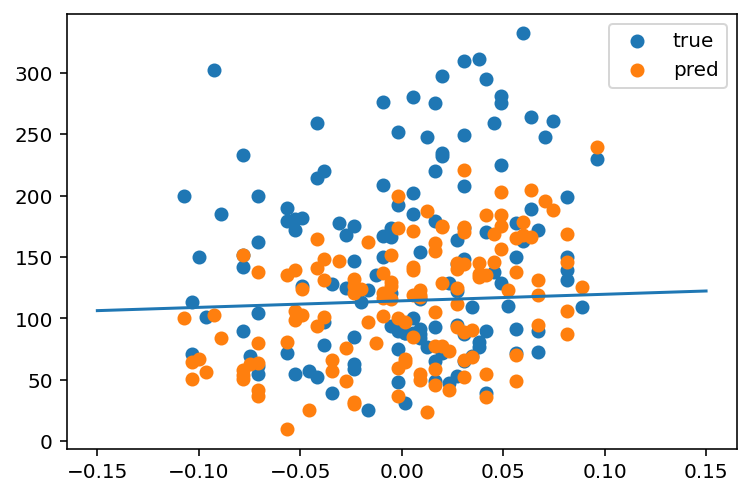

In [211]:
prediction = model(X_test, W, b)
plt.scatter(X_test[:, 0], y_test, label="true")
plt.scatter(X_test[:, 0], prediction, label="pred")
x = np.linspace(-0.15, 0.15, 10)
plt.plot(x, W[0]*x+b)
plt.legend()
plt.show()

어느정도 데이터를 설명하지만 실제 데이터보다 예측값이 작게 나타나는 경향이 있다.

# 프로젝트 2 : 날씨 좋은 월요일 오후 세 시, 자전거 타는 사람은 몇 명?

## (1) 데이터 가져오기

In [212]:
import pandas as pd
from sklearn.model_selection import train_test_split
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings('ignore')
%matplotlib inline 
%config InlineBackend.figure_format = 'retina'

bike = pd.read_csv('~/aiffel/bike_regression/data/bike-sharing-demand/train.csv')
bike.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


## Data Fields
* datetime - hourly date + timestamp  
* season -  1 = spring, 2 = summer, 3 = fall, 4 = winter 
* holiday - whether the day is considered a holiday
* workingday - whether the day is neither a weekend nor holiday
* weather - 1: Clear, Few clouds, Partly cloudy, Partly cloudy
    * 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
    * 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
    * 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog 
* temp - temperature in Celsius
* atemp - "feels like" temperature in Celsius (체감온도)
* humidity - relative humidity
* windspeed - wind speed
* casual - number of non-registered user rentals initiated
* registered - number of registered user rentals initiated
* count - number of total rentals (casual + registered)

## (2) datetime 컬럼을 datetime 자료형으로 변환하고 연, 월, 일, 시, 분, 초까지 6가지 컬럼 생성하기

In [213]:
bike['datetime'] = pd.to_datetime(bike['datetime'])
bike['year'] = bike['datetime'].dt.year
bike['month'] = bike['datetime'].dt.month
bike['day'] = bike['datetime'].dt.day
bike['hour'] = bike['datetime'].dt.hour
bike['minute'] = bike['datetime'].dt.minute
bike['second'] = bike['datetime'].dt.second

In [214]:
bike.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour,minute,second
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011,1,1,0,0,0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011,1,1,1,0,0
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011,1,1,2,0,0
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,2011,1,1,3,0,0
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,2011,1,1,4,0,0


## (3) year, month, day, hour, minute, second 데이터 개수 시각화하기

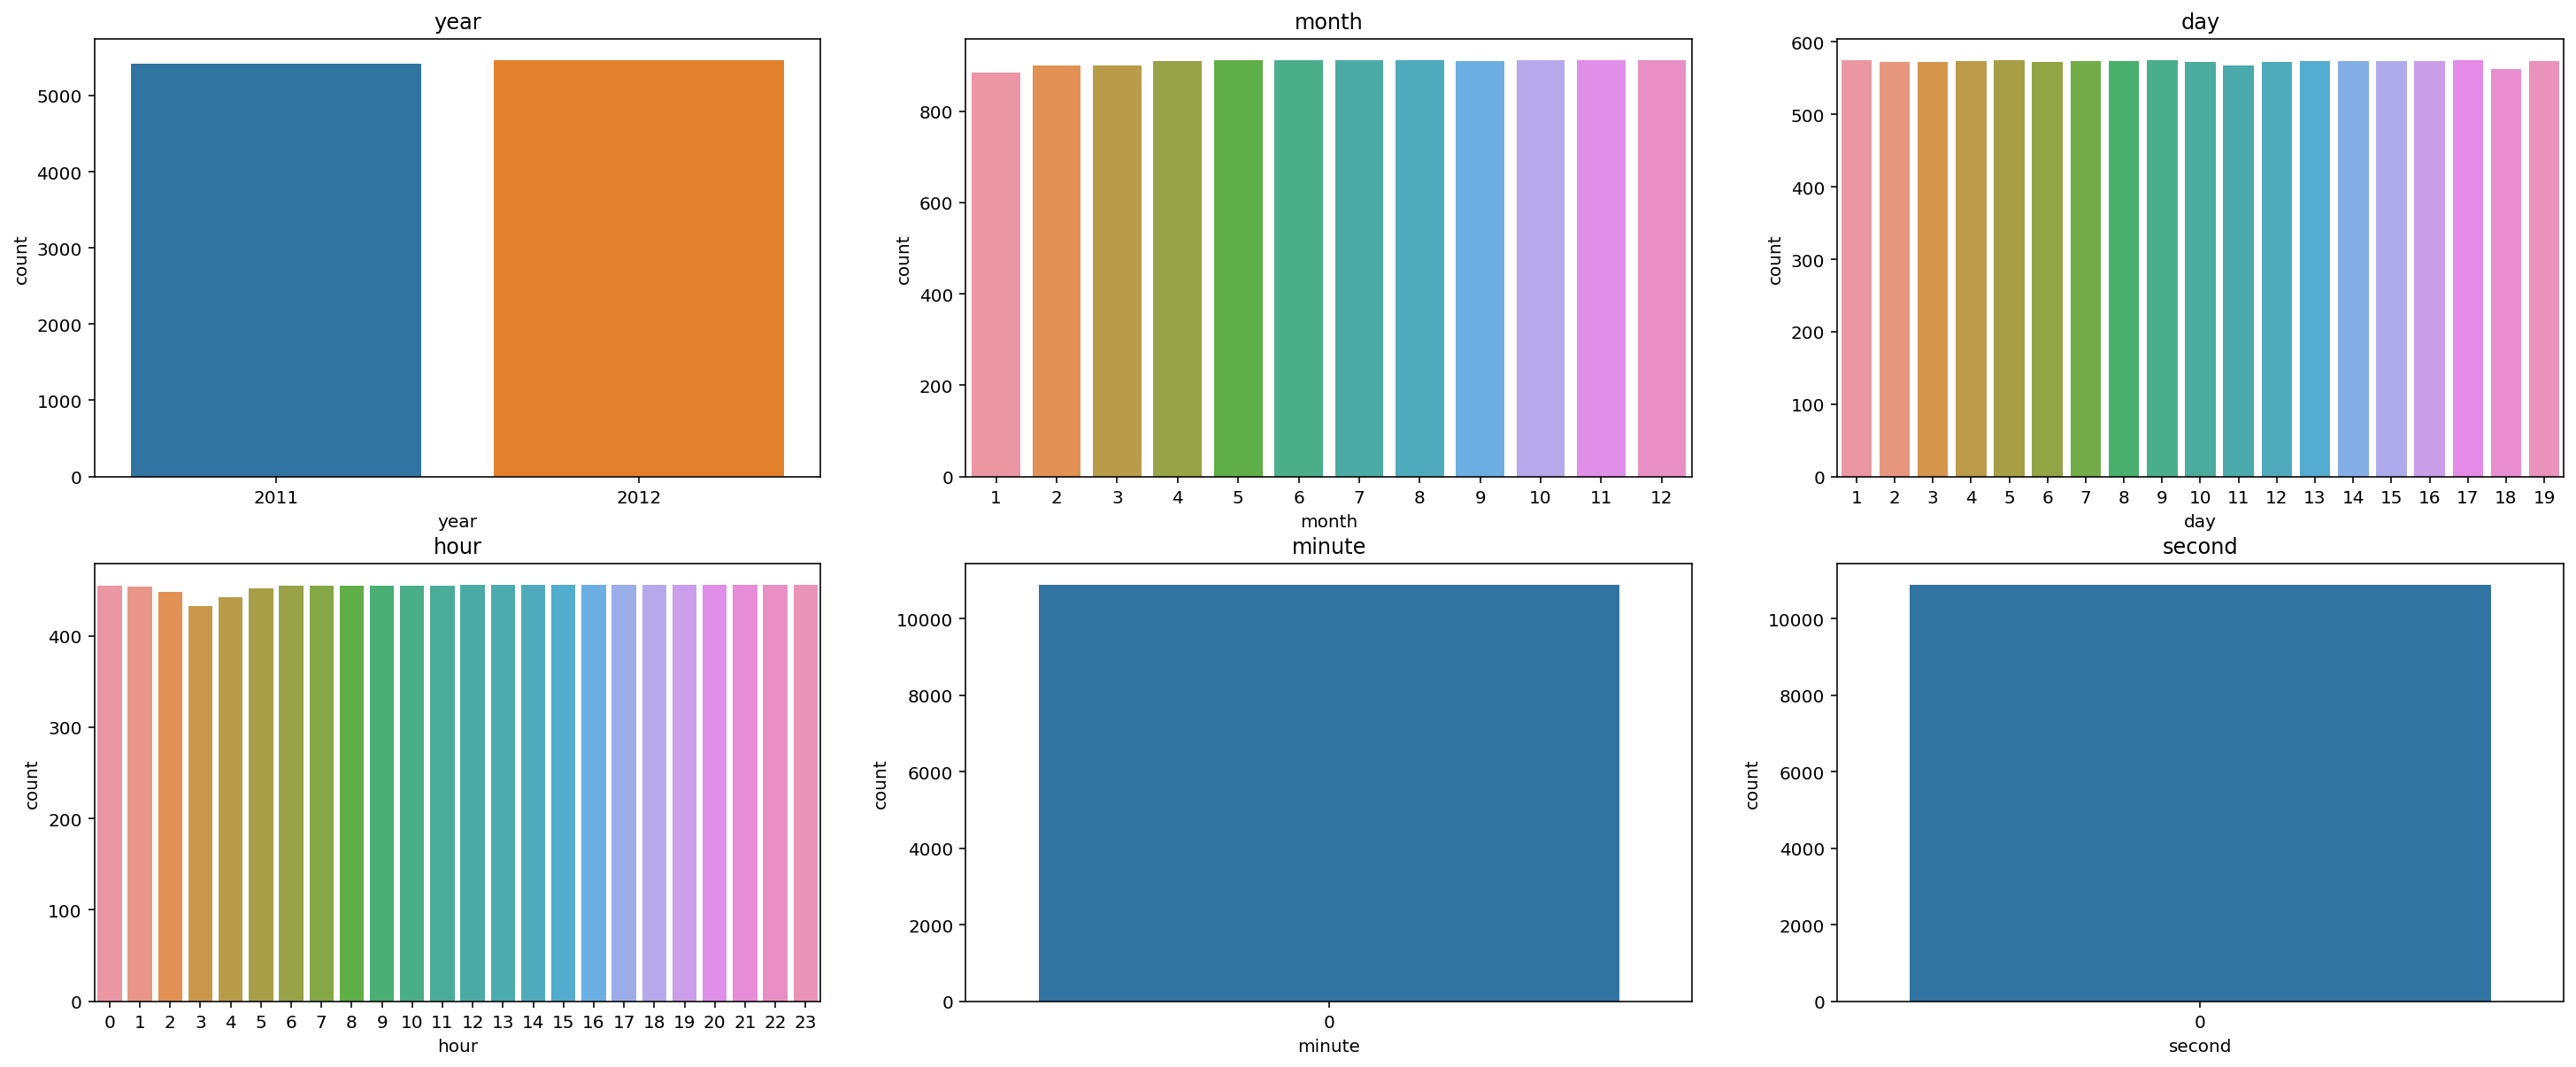

In [215]:
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

cols = ['year', 'month', 'day', 'hour', 'minute', 'second']
plt.figure(figsize=(25, 10))
for i in range(6) : 
    plt.subplot(2, 3, i+1)
    plt.title(cols[i])
    sns.countplot(bike[cols[i]])

좀 이상하지만 모두 고르게 분포되어 있다

## (4) X, y 컬럼 선택 및 train/test 데이터 분리

y = count로 하고 EDA 진행

In [216]:
print(bike.isnull().sum())
bike.describe()

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
year          0
month         0
day           0
hour          0
minute        0
second        0
dtype: int64


,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour,minute,second
count,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.0,10886.0
mean,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132,2011.501929,6.521495,9.992559,11.541613,0.0,0.0
std,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454,0.500019,3.444373,5.476608,6.915838,0.0,0.0
min,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000,2011.000000,1.000000,1.000000,0.000000,0.0,0.0
25%,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000,2011.000000,4.000000,5.000000,6.000000,0.0,0.0
50%,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000,2012.000000,7.000000,10.000000,12.000000,0.0,0.0
75%,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000,2012.000000,10.000000,15.000000,18.000000,0.0,0.0
max,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000,2012.000000,12.000000,19.000000,23.000000,0.0,0.0


일단 결측치는 없고, datetime을 일,년,월로 쪼개서 추가해주었으니 datetime행 삭제, minute와 second 모두 0 으로 통일되어 아무런 정보도 없으므로 삭제한다.

In [217]:
bike = bike.drop(['datetime','minute','second'], axis=1)

In [218]:
bike.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour
0,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011,1,1,0
1,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011,1,1,1
2,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011,1,1,2
3,1,0,0,1,9.84,14.395,75,0.0,3,10,13,2011,1,1,3
4,1,0,0,1,9.84,14.395,75,0.0,0,1,1,2011,1,1,4


In [219]:
bike.dtypes

season          int64
holiday         int64
workingday      int64
weather         int64
temp          float64
atemp         float64
humidity        int64
windspeed     float64
casual          int64
registered      int64
count           int64
year            int64
month           int64
day             int64
hour            int64
dtype: object

In [220]:
bike['weekend'] = np.where((bike['holiday']==0) & (bike['workingday']==0), 1, 0) # holiday도 아니고 일하는날도 아닌 날 -> 주말

<AxesSubplot:>

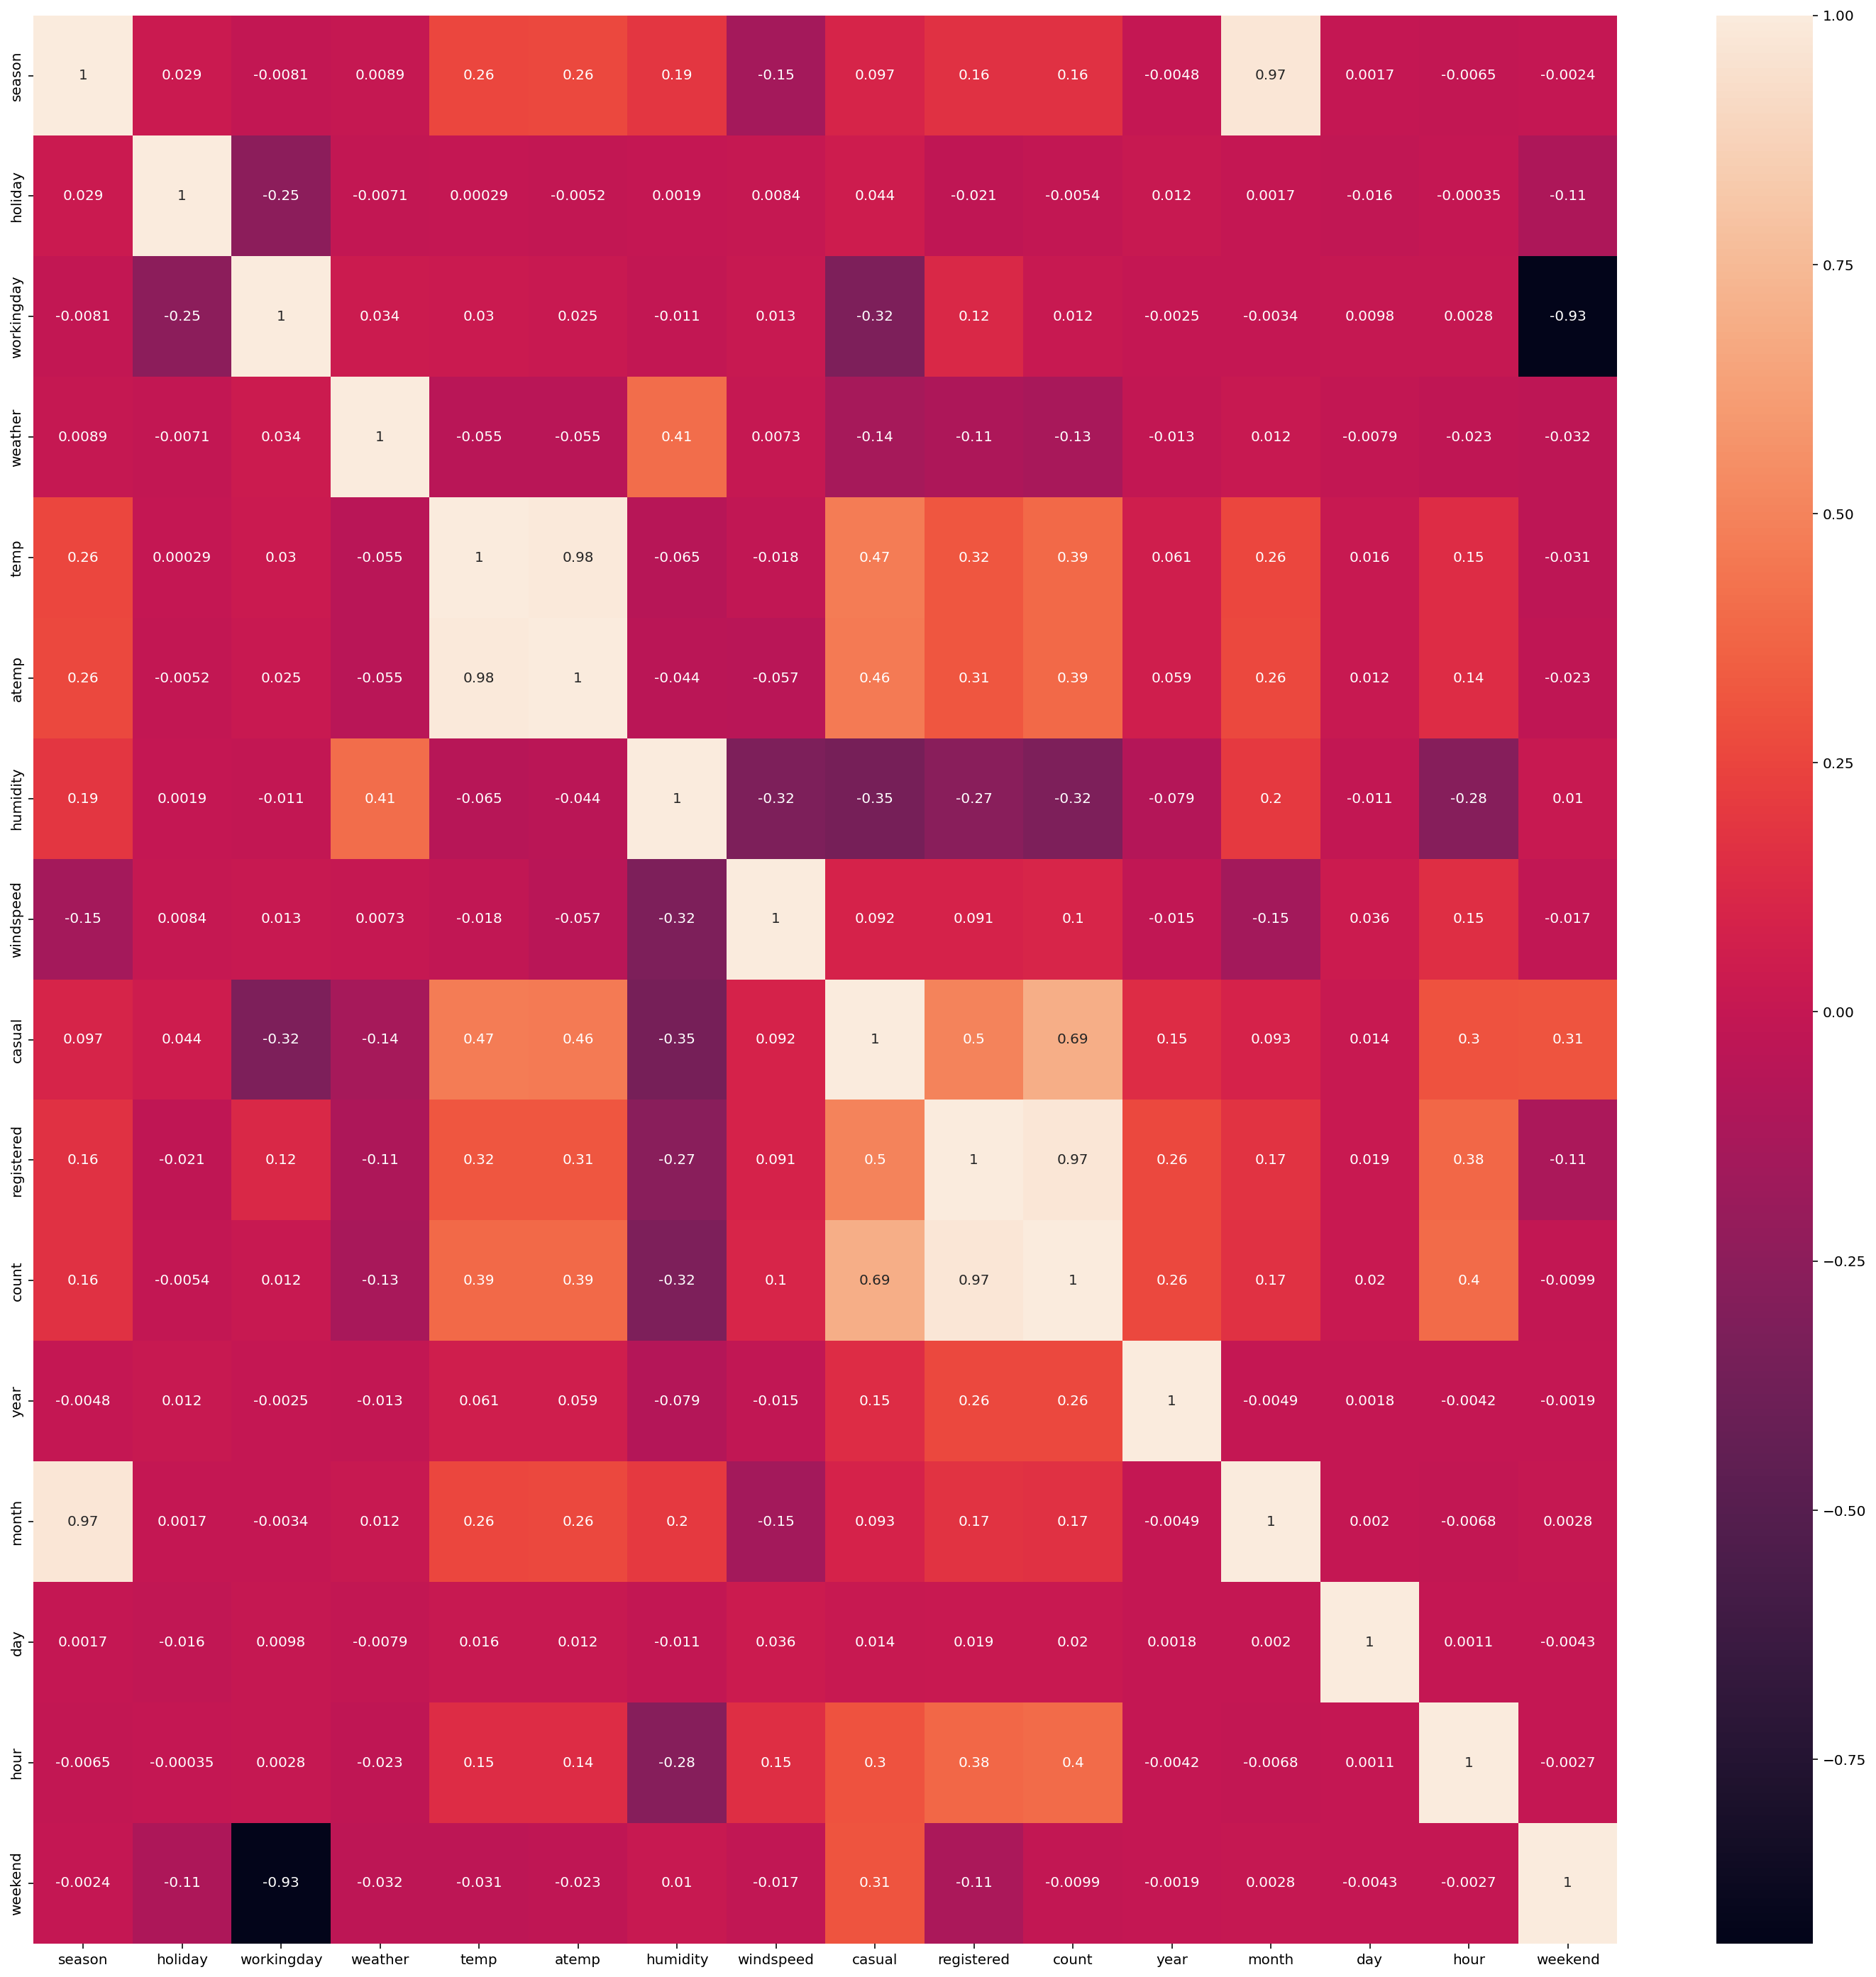

In [221]:
plt.figure(figsize=(25,25))
sns.heatmap(bike.corr(), annot=True)

상관관계 분석 결과 month와 season의 상관관계가 0.97
count와 registered가 0.97
temp와 atemp가 0.98로 다중공선성 위험이 매우 높다. 따라서 몇월인지보다 계절이 더 중요할 것 같다고 생각이 들어 month제거, registered 제거, 진짜 기온보다는 체감온도가 중요하다고 생각하기 때문에 temp를 제거해주겠다.
workingday와 holiday를 통해 weekend를 만들어서 weekend와 workingday와 -0.93으로 매우 높다. 주말여부가 자전거 count에 더 좋다고 생각이 되어서 workingday를 제거했다.

In [222]:
bike = bike.drop(['registered','temp','month','workingday'], axis = 1)
bike.head()

,season,holiday,weather,atemp,humidity,windspeed,casual,count,year,day,hour,weekend
0,1,0,1,14.395,81,0.0,3,16,2011,1,0,1
1,1,0,1,13.635,80,0.0,8,40,2011,1,1,1
2,1,0,1,13.635,80,0.0,5,32,2011,1,2,1
3,1,0,1,14.395,75,0.0,3,13,2011,1,3,1
4,1,0,1,14.395,75,0.0,0,1,2011,1,4,1


temp:온도(도씨), atemp(체감온도), humidity(상대습도), windspeed(바람속도), casual(비가입 렌탈), registered(가입자 렌탈) 빼고는 모두 범주형이기 때문에 category로 타입 변경.

In [223]:
bike = bike.astype('category')

In [224]:
bike = bike.astype({'atemp':'float64','humidity':'float64','windspeed':'float64','casual':'float64','count':'float64'})

In [225]:
bike = bike[['season', 'holiday', 'weather', 'atemp', 'humidity', 'windspeed','casual', 'year', 'day', 'hour', 'weekend', 'count']]

In [226]:
bike.dtypes

season       category
holiday      category
weather      category
atemp         float64
humidity      float64
windspeed     float64
casual        float64
year         category
day          category
hour         category
weekend      category
count         float64
dtype: object

In [227]:
# EDA를 위해 수치형, 범주형으로 나누어서 진행
num_df = bike.select_dtypes(include=np.number)
cat_df = bike.select_dtypes(exclude=np.number)

### 수치형변수 EDA

In [228]:
num_df.head()

,atemp,humidity,windspeed,casual,count
0,14.395,81.0,0.0,3.0,16.0
1,13.635,80.0,0.0,8.0,40.0
2,13.635,80.0,0.0,5.0,32.0
3,14.395,75.0,0.0,3.0,13.0
4,14.395,75.0,0.0,0.0,1.0


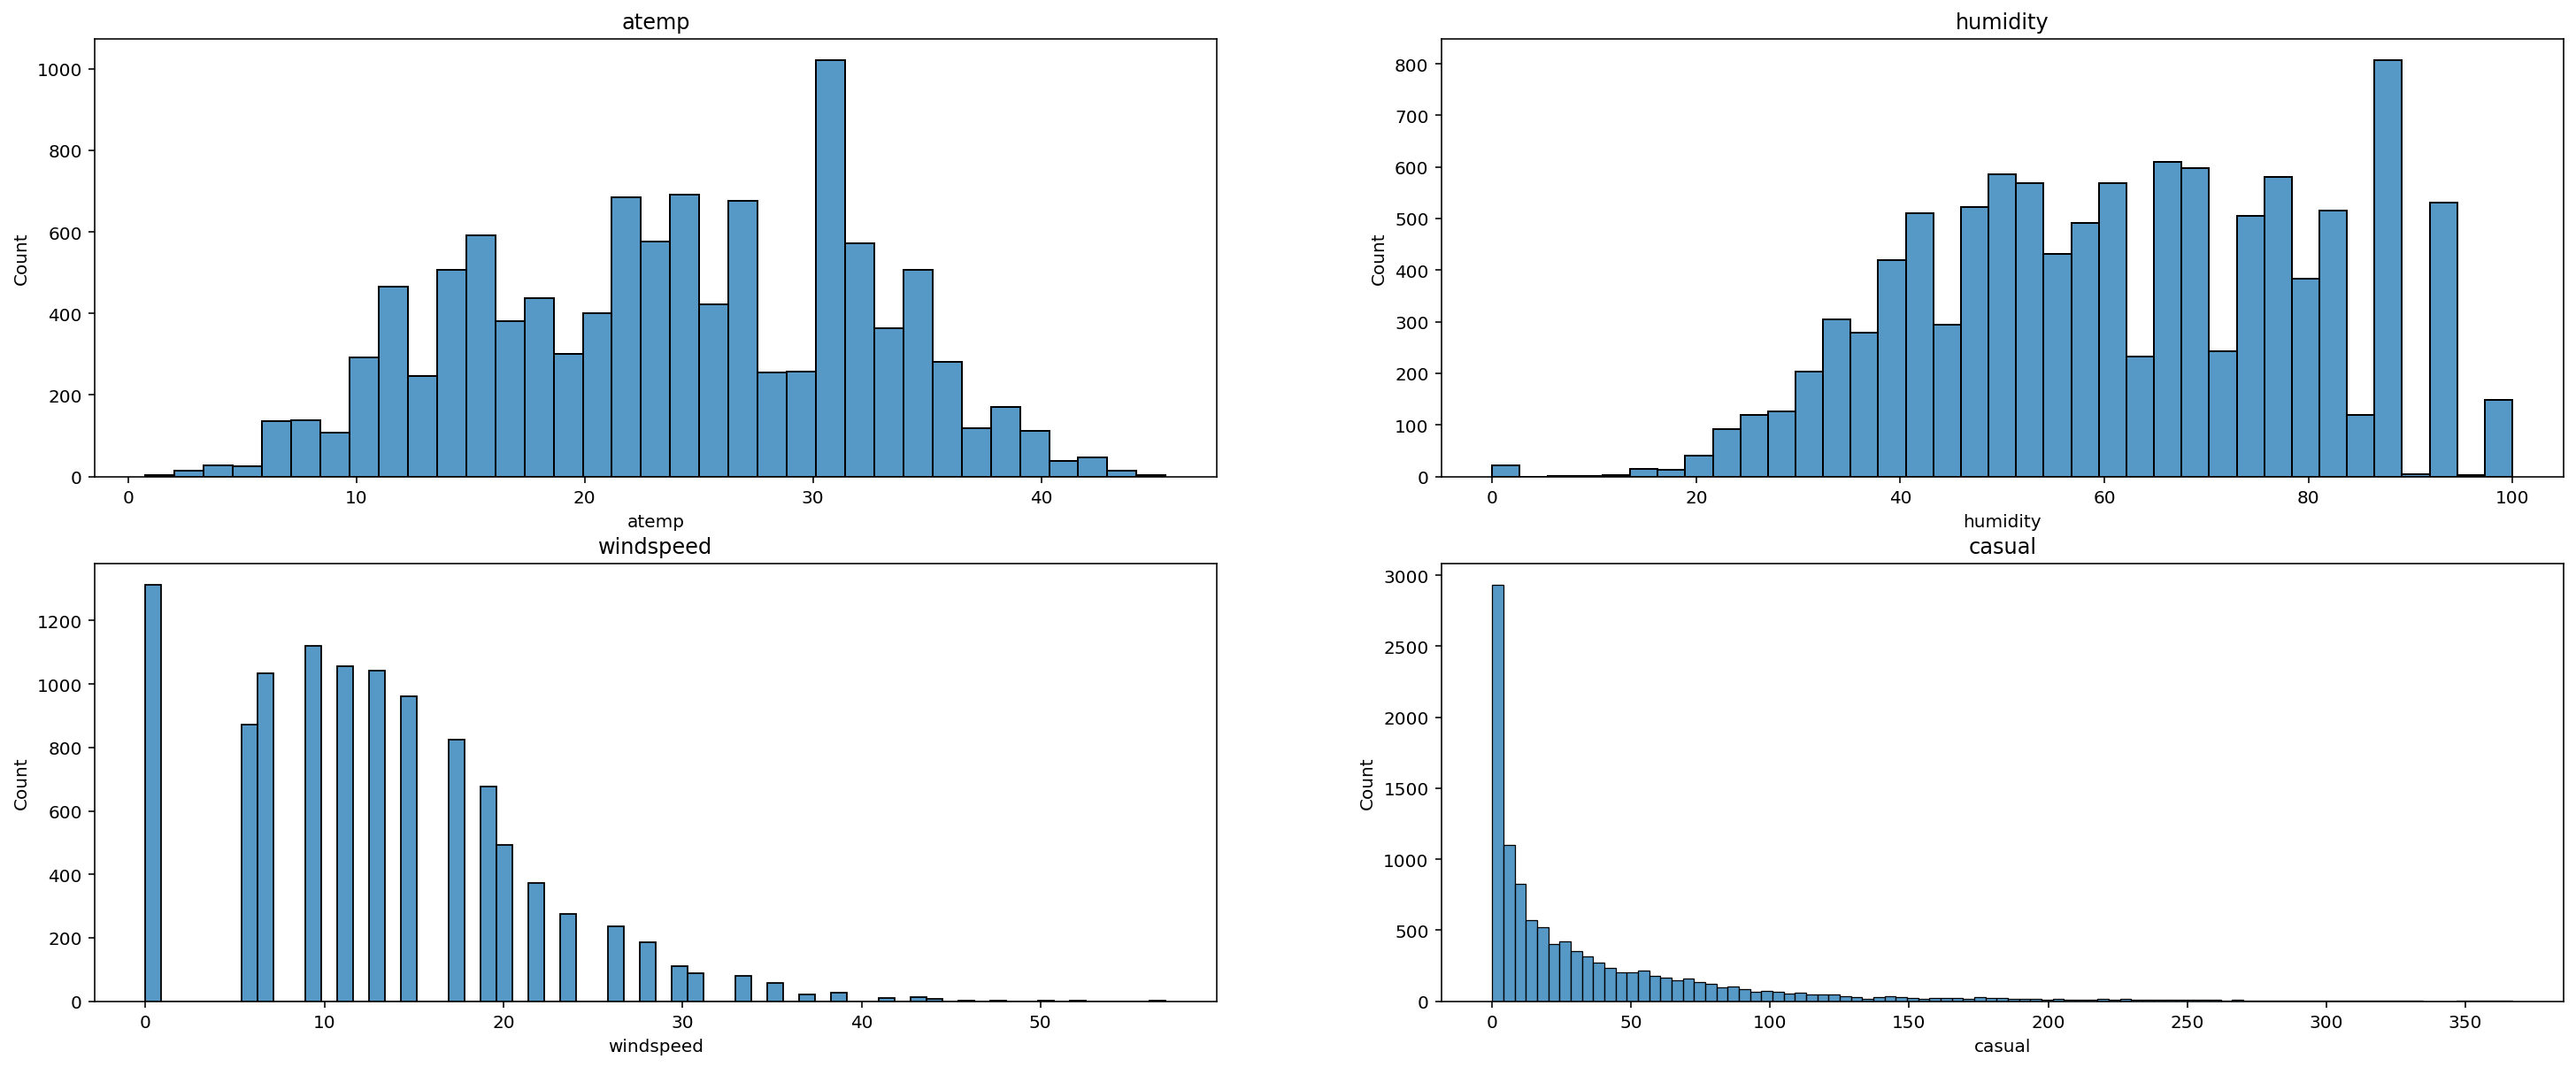

In [229]:
num_cols = ['atemp','humidity','windspeed','casual']
plt.figure(figsize=(25, 10))
for i in range(4) : 
    plt.subplot(2, 2, i+1)
    plt.title(num_cols[i])
    sns.histplot(num_df[num_cols[i]])

windspeed, casual가 정규분포에서 많이 벗어나 있다(long-tailed). 수치형 변수를 로그변환 또는 정규화해주면 좋을 것 같다.

<AxesSubplot:xlabel='casual', ylabel='Count'>

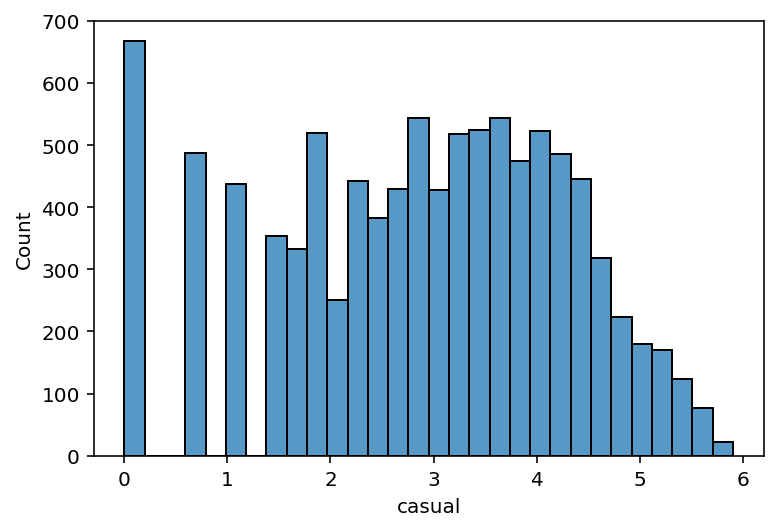

In [230]:
sns.histplot(np.log(bike['casual']))

<AxesSubplot:xlabel='windspeed', ylabel='Count'>

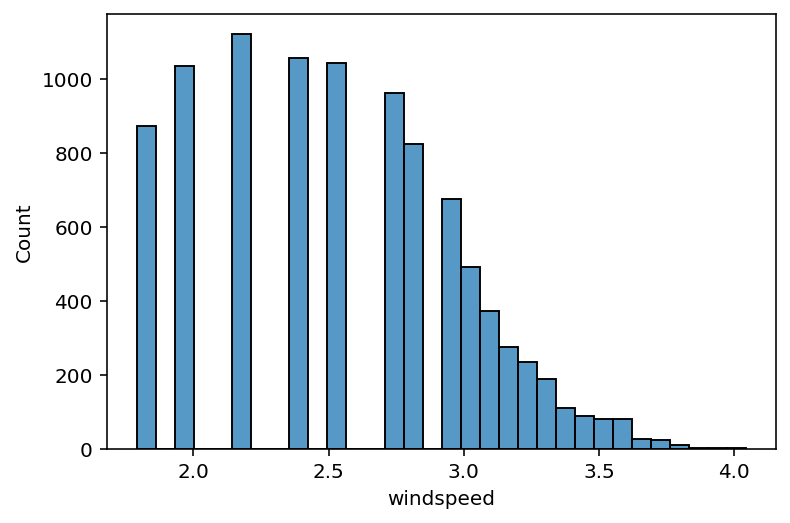

In [231]:
sns.histplot(np.log(bike['windspeed']))

### 범주형 변수 EDA

In [232]:
cat_df

,season,holiday,weather,year,day,hour,weekend
0,1,0,1,2011,1,0,1
1,1,0,1,2011,1,1,1
2,1,0,1,2011,1,2,1
3,1,0,1,2011,1,3,1
4,1,0,1,2011,1,4,1
...,...,...,...,...,...,...,...
10881,4,0,1,2012,19,19,0
10882,4,0,1,2012,19,20,0
10883,4,0,1,2012,19,21,0
10884,4,0,1,2012,19,22,0


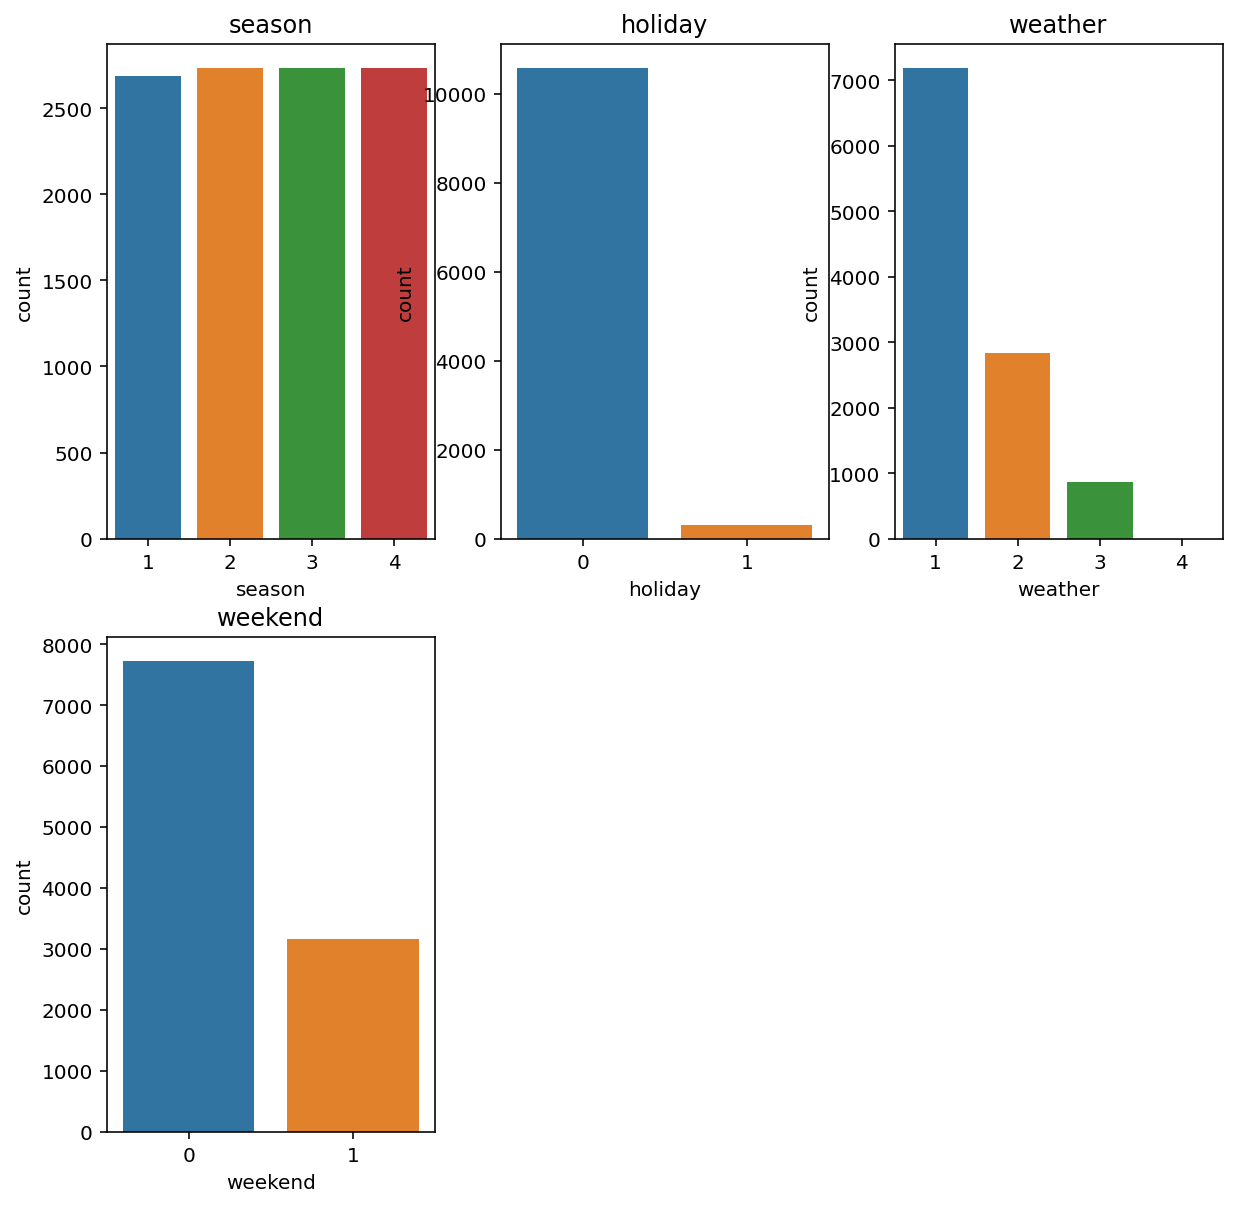

In [233]:
# year, day, hour는 위에서 봤으므로
cat_cols = ['season','holiday','weather','weekend']
plt.figure(figsize=(10, 10))
for i in range(4) : 
    plt.subplot(2, 3, i+1)
    plt.title(cat_cols[i])
    sns.countplot(cat_df[cat_cols[i]])

공휴일 여부가 공휴일이 별로 없으니까 1이 너무 적다. holiday와 weekend를 합쳐서 no_workingday로 만들기,
또한 날씨가 4인 날이 별로 없어서 3으로 pooling

In [234]:
bike.loc[bike['weather'] == 4,'weather']= 3
bike['weather'].unique()

[1, 2, 3]
Categories (4, int64): [1, 2, 3, 4]

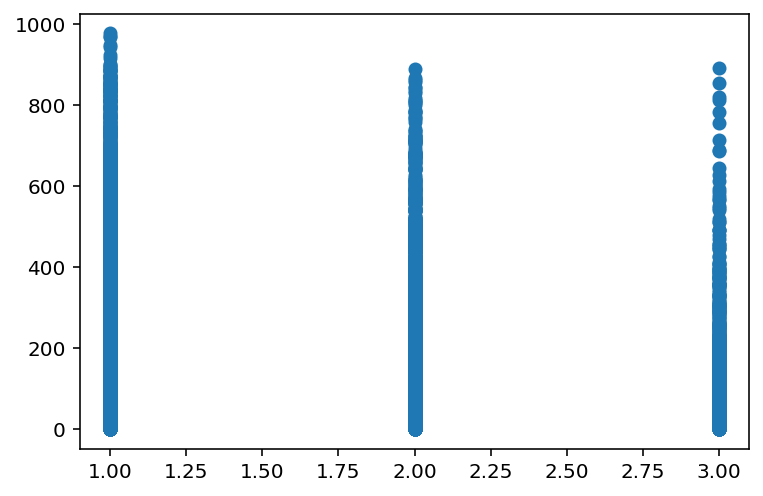

In [235]:
plt.scatter(bike['weather'], bike['count'])

### 전체 데이터 train test split 및 전처리 한번에

In [236]:
bike = pd.read_csv('~/aiffel/bike_regression/data/bike-sharing-demand/train.csv')

#datetime형 변환
bike['datetime'] = pd.to_datetime(bike['datetime'])

#년, 일, 시간 추출
bike['year'] = bike['datetime'].dt.year
bike['day'] = bike['datetime'].dt.day
bike['hour'] = bike['datetime'].dt.hour

bike['no_workingday'] = np.where(bike['workingday']==0, 1, 0) # holiday or 주말 -> 일 안하는 날
bike = bike.drop(['registered','temp','workingday','holiday'],
                 axis = 1)# 상관관계높거나, 필요없는column drop
bike = bike.astype('category')
bike = bike.astype({'atemp':'float64','humidity':'float64','windspeed':'float64','casual':'float64','count':'float64'})
bike = bike[['season', 'weather', 'atemp', 'humidity', 'windspeed','casual', 'year', 'day', 'hour', 'no_workingday','count']]
bike.loc[bike['weather'] == 4,'weather']= 3

In [237]:
y_df = bike['count']
X_df = bike.drop('count', axis=1)

In [326]:
# train test split
X_train, X_test, y_train, y_test = train_test_split(X_df,
                                                    y_df,
                                                    test_size=0.3,
                                                    random_state=42)

In [329]:
# 정규화
from sklearn.preprocessing import StandardScaler

train_num = X_train.select_dtypes(include=np.number)
train_cat = X_train.select_dtypes(exclude=np.number)

test_num = X_test.select_dtypes(include=np.number)
test_cat = X_test.select_dtypes(exclude=np.number)

numcols = train_num.columns

# 수치형만 정규화 후 합병
scaler = StandardScaler()
train_num = scaler.fit_transform(train_num)
test_num = scaler.transform(test_num)

y_train.reset_index(drop = True)
y_test.reset_index(drop = True)

X_train = pd.concat([pd.DataFrame(train_num, columns = numcols),train_cat.reset_index(drop=True)], axis=1)
X_test = pd.concat([pd.DataFrame(test_num, columns = numcols),test_cat.reset_index(drop=True)], axis=1)

## (5) LinearRegression 모델 학습

In [366]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [367]:
y_pred = model.predict(X_test)
y_pred

array([184.94451761,  20.32132906, 109.8297045 , ..., 241.53686306,
       153.25058053,  16.75094555])

In [368]:
def RMSE(a, b):
    mse = np.mean(np.square(a-b))  # 두 값의 차이의 제곱의 평균
    rmse = np.sqrt(mse)      # MSE의 제곱근
    return rmse
print('RMSE', RMSE(y_pred, y_test))
print('MSE', RMSE(y_pred, y_test) ** 2)

RMSE 111.88239037728701
MSE 12517.669276535646


In [371]:
def RMSE(a, b):
    mse = np.mean(np.square(a-b))  # 두 값의 차이의 제곱의 평균
    rmse = np.sqrt(mse)      # MSE의 제곱근
    return rmse

def loss(x, w, b, y):
    predictions = model(x, w, b)
    L = RMSE(predictions, y)
    return L

def model(x, w, b):
    y = np.dot(x, W) + b #다중선형회귀
    return y

W = np.random.rand(X_train.shape[1]) * 0.001
b = np.random.rand(1) * 0.001

rmse = loss(X_test, W, b, y_test)

predictions = model(X_test, W, b)
print('학습 전 prediction: ', predictions)
print('학습전 rmse:', rmse)
        

학습 전 prediction:  [0.58741615 0.58367269 0.58800528 ... 0.58748836 0.58540388 0.5856605 ]
학습전 rmse: 263.0549772229045


## (7) x축은 temp 또는 humidity로, y축은 count로 예측 결과 시각화하기

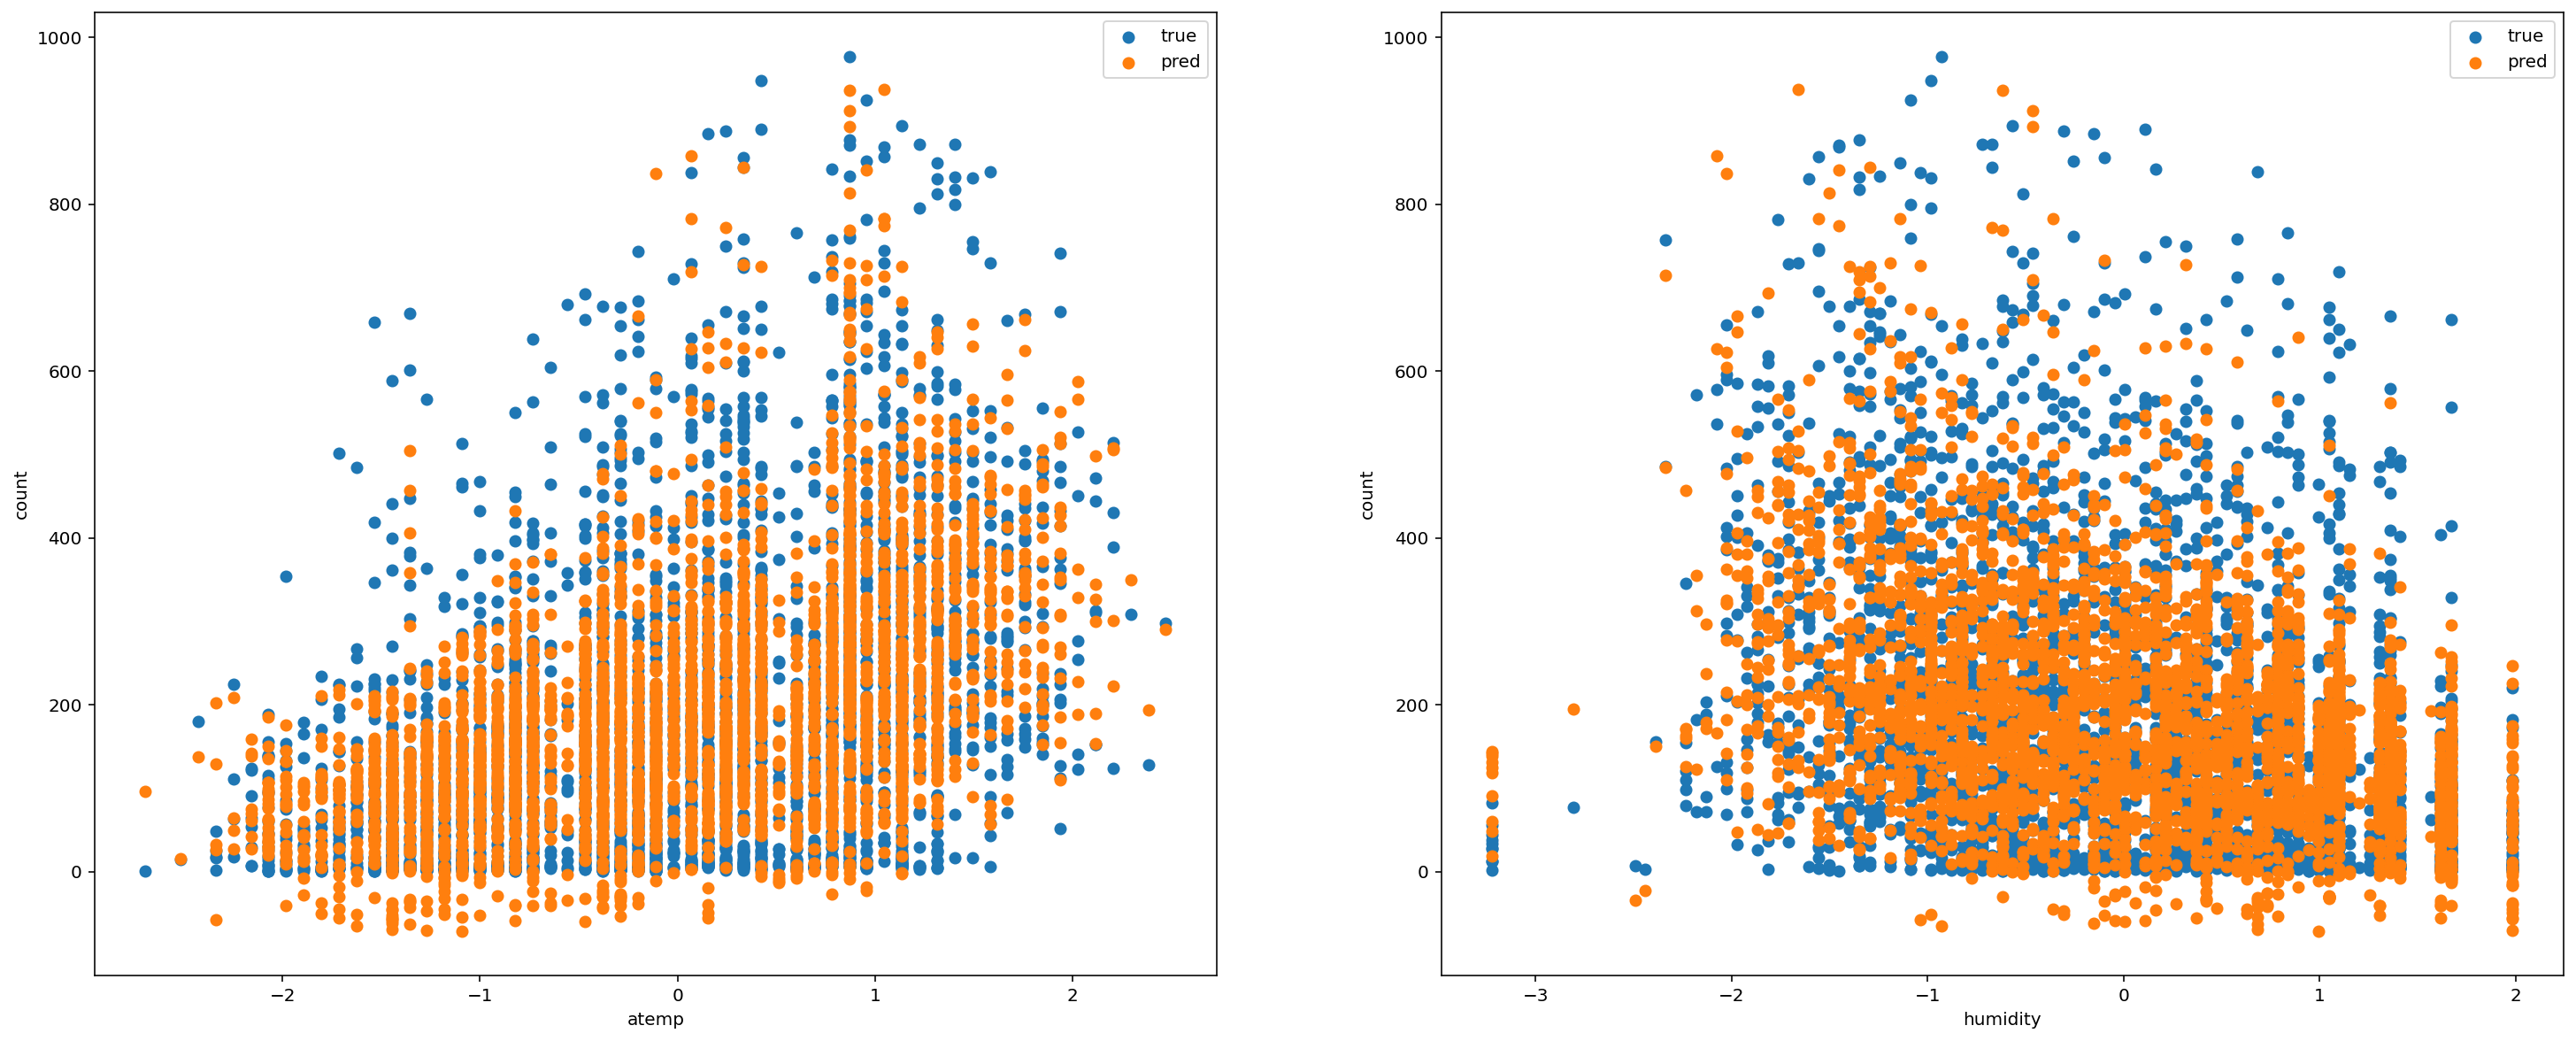

In [382]:
plt.figure(figsize=(25, 10))
c = ['atemp', 'humidity']
for i in range(2) : 
    plt.subplot(1, 2, i+1)
    plt.scatter(X_test[c[i]], y_test, label="true")
    plt.scatter(X_test[c[i]], y_pred, label="pred")
    plt.xlabel(c[i])
    plt.ylabel('count')
    plt.legend()